<a href="https://colab.research.google.com/github/wileyw/DeepLearningDemos/blob/master/TabularXGBoost/TabularDataXGBoostTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toy tutorial (https://www.datacamp.com/tutorial/xgboost-in-python)

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [6]:
data['PRICE'] = boston.target

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [9]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, booster='gblinear')

In [12]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[03:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 8.170026


In [19]:
# Run k-fold validation
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[03:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.724871,0.019074,19.704138,0.066506
2,18.006593,0.043519,17.963947,0.044863
3,16.385965,0.031945,16.373554,0.027572
4,14.994811,0.061012,15.007155,0.068742


In [21]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.761612
Name: test-rmse-mean, dtype: float64


In [22]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[03:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


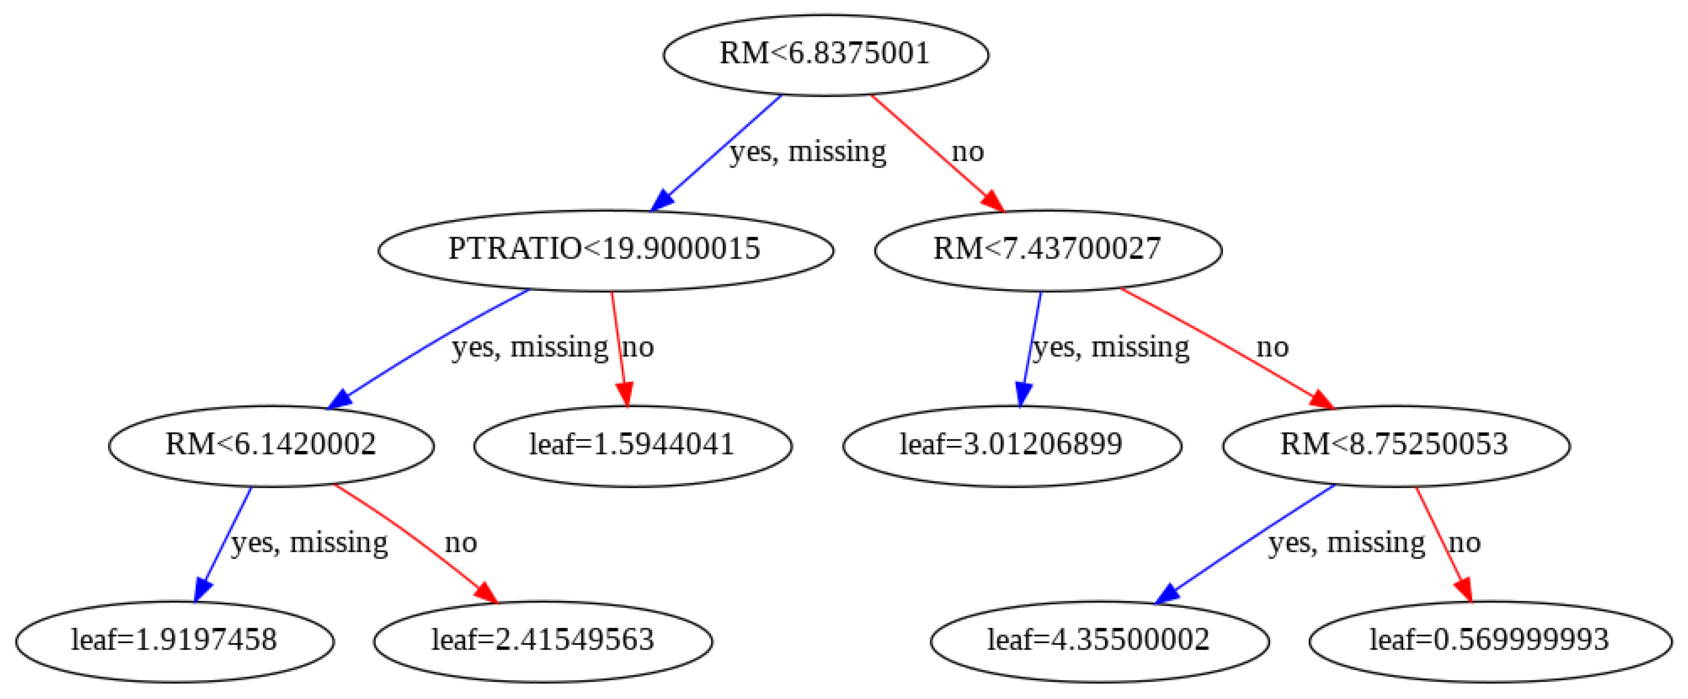

In [28]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

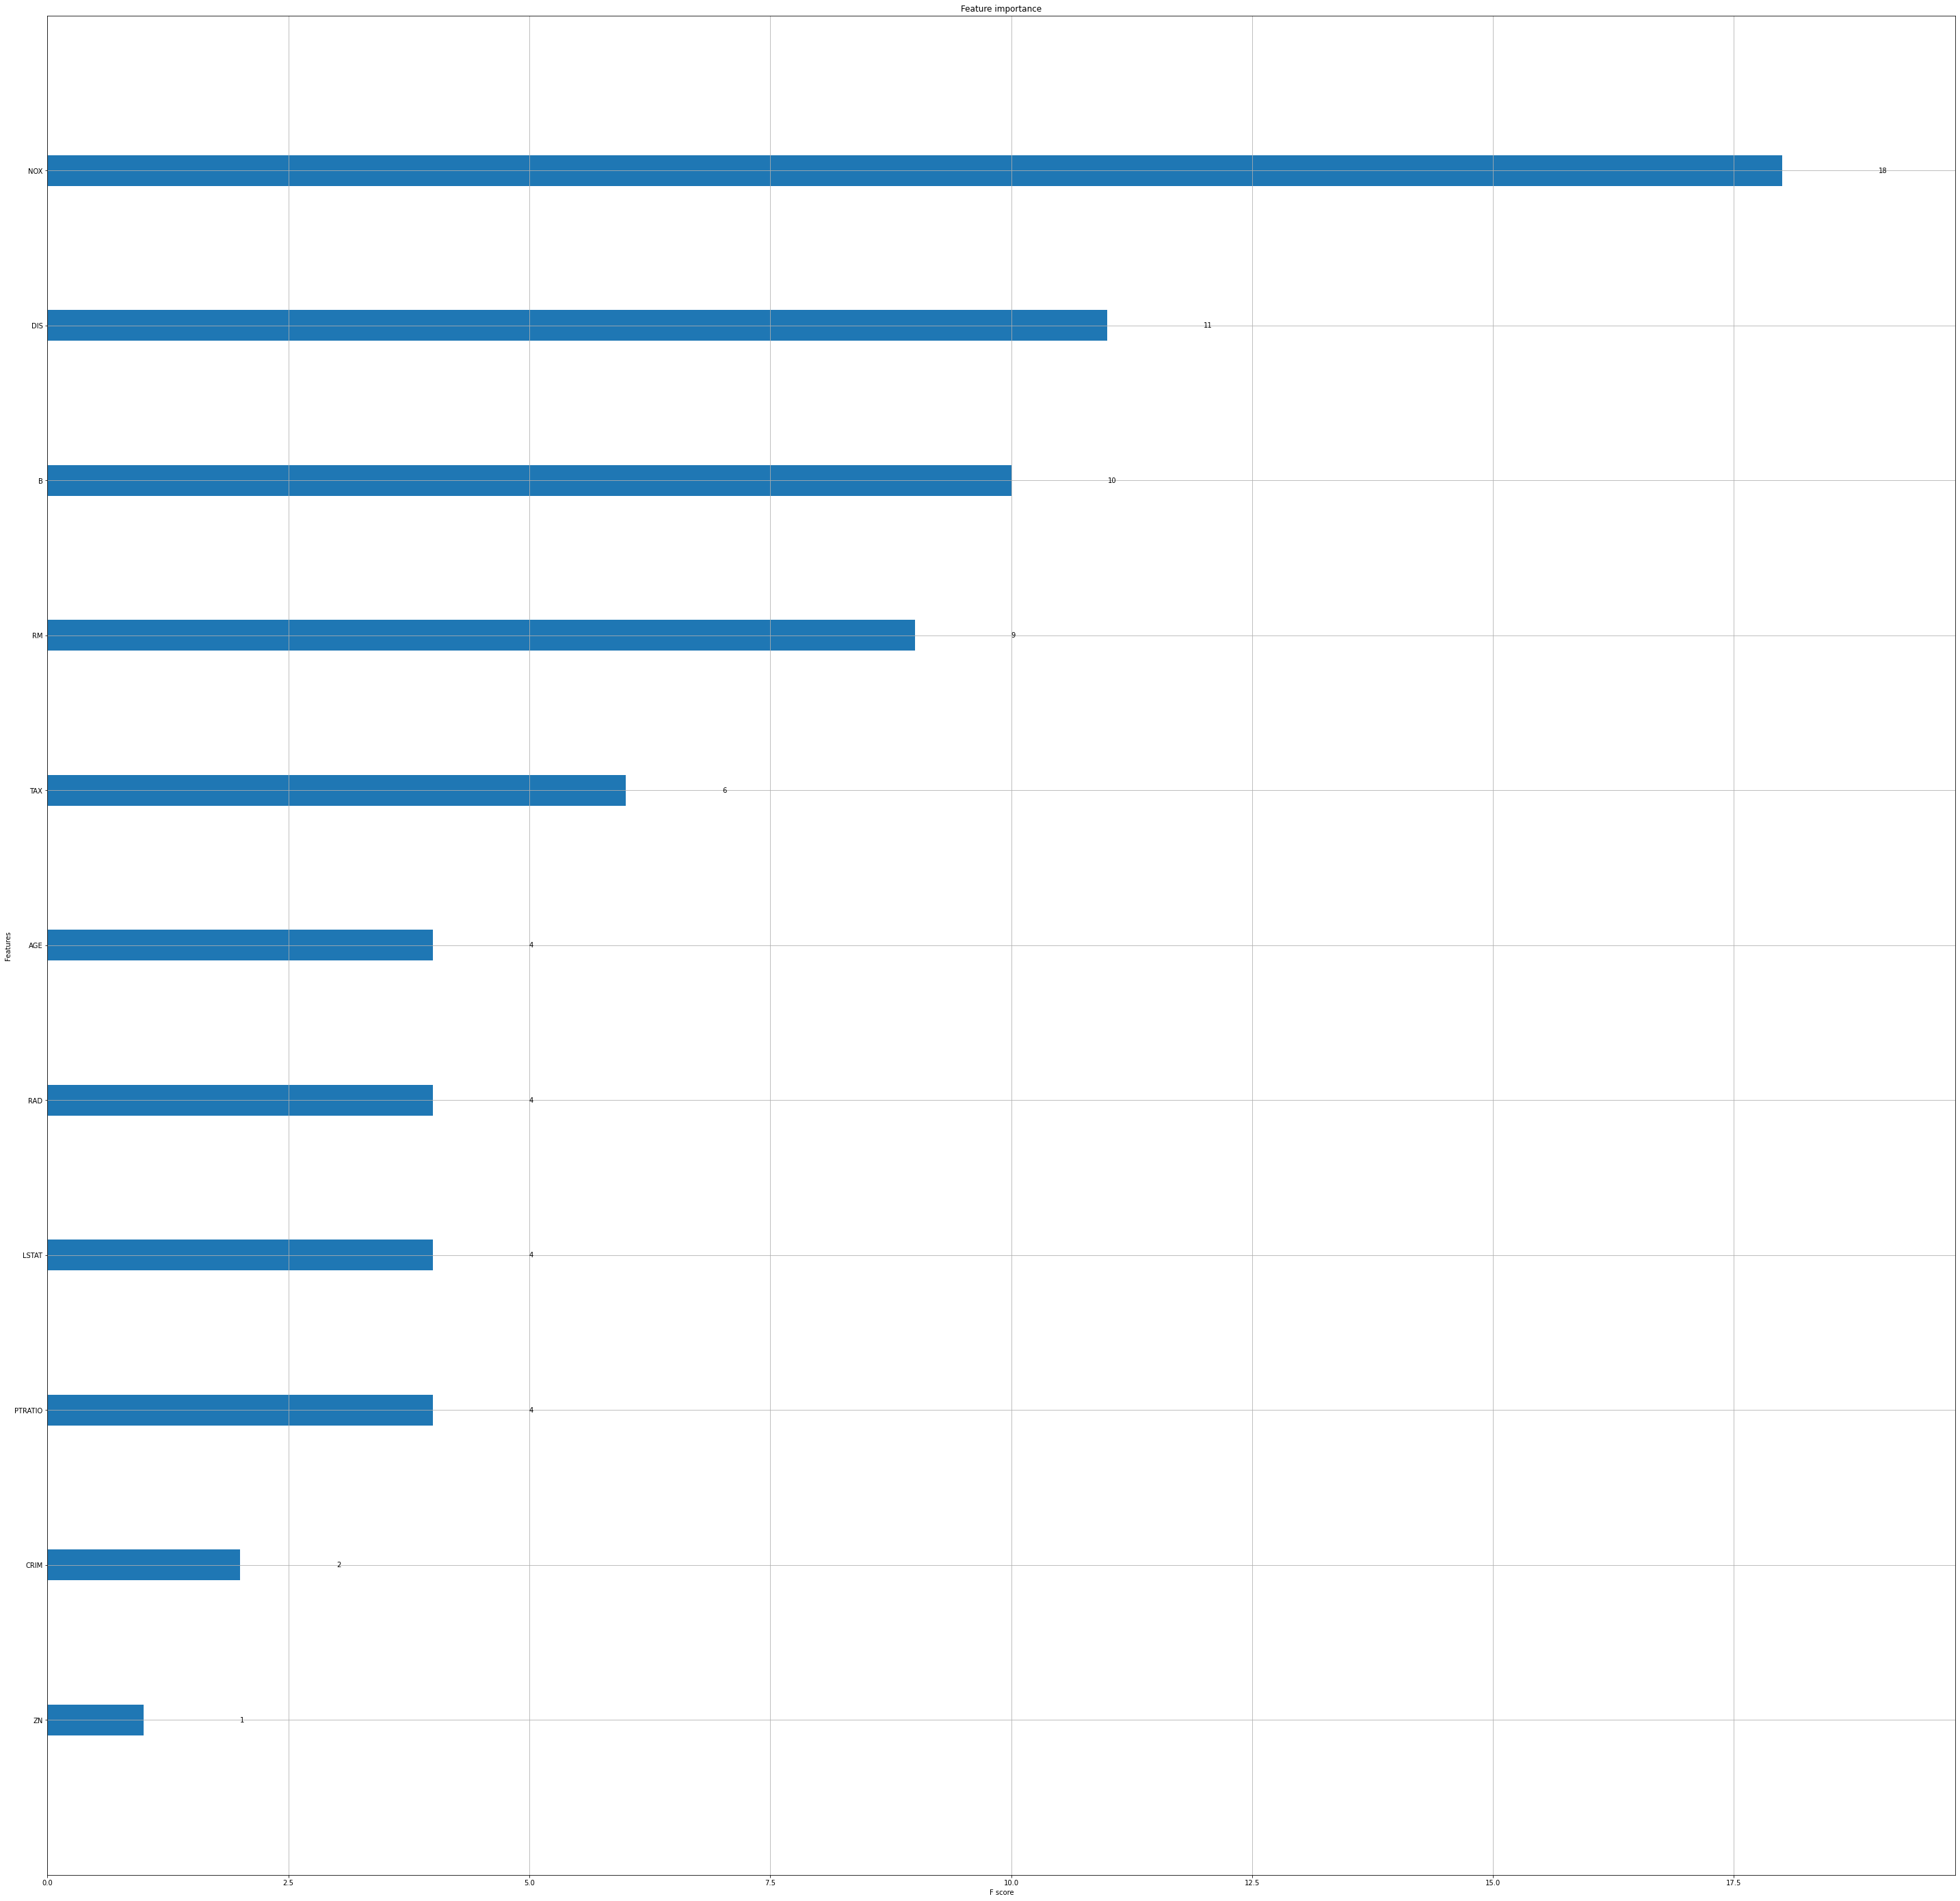

In [26]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# XGBoost Eye Movement Dataset

In [30]:
# Download eye movements dataset (https://www.openml.org/search?type=data&sort=runs&id=1044&status=active )
!wget https://www.openml.org/data/download/53927/eye_movements.arff

--2022-09-02 03:16:35--  https://www.openml.org/data/download/53927/eye_movements.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://api.openml.org/data/download/53927/eye_movements.arff [following]
--2022-09-02 03:16:36--  https://api.openml.org/data/download/53927/eye_movements.arff
Resolving api.openml.org (api.openml.org)... 131.155.11.11
Connecting to api.openml.org (api.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1380106 (1.3M) [text/plain]
Saving to: ‘eye_movements.arff.1’

eye_movements.arff. 100%[===================>]   1.32M  2.47MB/s    in 0.5s    

2022-09-02 03:16:37 (2.47 MB/s) - ‘eye_movements.arff.1’ saved [1380106/1380106]



In [31]:
# Load data
from scipy.io import arff
import pandas as pd
data = arff.loadarff('eye_movements.arff')
df = pd.DataFrame(data[0])

In [32]:
df.head()

,lineNo,assgNo,fixcount,firstPassCnt,P1stFixation,P2stFixation,prevFixDur,firstfixDur,firstPassFixDur,nextFixDur,...,regressLen,nextWordRegress,regressDur,pupilDiamMax,pupilDiamLag,timePrtctg,nWordsInTitle,titleNo,wordNo,label
0,1.0,1.0,1.0,1.0,b'1',b'0',0.0,100.0,100.0,99.0,...,0.0,b'0',0.0,0.0095,0.145,0.0131,7.0,4.0,3.0,b'0'
1,2.0,1.0,1.0,1.0,b'1',b'0',99.0,278.0,278.0,159.0,...,0.0,b'0',0.0,0.0095,0.183,0.0363,7.0,1.0,1.0,b'0'
2,3.0,1.0,1.0,1.0,b'1',b'0',278.0,159.0,159.0,159.0,...,0.0,b'0',0.0,0.0370,0.183,0.0208,7.0,1.0,3.0,b'0'
3,4.0,1.0,1.0,1.0,b'1',b'0',159.0,159.0,159.0,139.0,...,0.0,b'0',0.0,0.0370,0.183,0.0208,7.0,1.0,5.0,b'0'
4,5.0,1.0,1.0,1.0,b'1',b'0',159.0,139.0,139.0,239.0,...,0.0,b'0',0.0,0.0390,0.183,0.0182,7.0,1.0,6.0,b'0'


In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [49]:
print(df.dtypes)

lineNo             float64
assgNo             float64
fixcount           float64
firstPassCnt       float64
P1stFixation        object
P2stFixation        object
prevFixDur         float64
firstfixDur        float64
firstPassFixDur    float64
nextFixDur         float64
firstSaccLen       float64
lastSaccLen        float64
prevFixPos         float64
landingPos         float64
leavingPos         float64
totalFixDur        float64
meanFixDur         float64
nRegressFrom       float64
regressLen         float64
nextWordRegress     object
regressDur         float64
pupilDiamMax       float64
pupilDiamLag       float64
timePrtctg         float64
nWordsInTitle      float64
titleNo            float64
wordNo             float64
label               object
dtype: object


In [50]:
df['P1stFixation'] = df['P1stFixation'].astype(float)
df['P2stFixation'] = df['P2stFixation'].astype(float)
df['nextWordRegress'] = df['nextWordRegress'].astype(float)
df['label'] = df['label'].astype(float)
print(df.dtypes)

lineNo             float64
assgNo             float64
fixcount           float64
firstPassCnt       float64
P1stFixation       float64
P2stFixation       float64
prevFixDur         float64
firstfixDur        float64
firstPassFixDur    float64
nextFixDur         float64
firstSaccLen       float64
lastSaccLen        float64
prevFixPos         float64
landingPos         float64
leavingPos         float64
totalFixDur        float64
meanFixDur         float64
nRegressFrom       float64
regressLen         float64
nextWordRegress    float64
regressDur         float64
pupilDiamMax       float64
pupilDiamLag       float64
timePrtctg         float64
nWordsInTitle      float64
titleNo            float64
wordNo             float64
label              float64
dtype: object


In [60]:
eye_features = df.iloc[:,2:24]
labels = df.iloc[:, -1]
print(eye_features.columns, df.columns[27])

Index(['fixcount', 'firstPassCnt', 'P1stFixation', 'P2stFixation',
       'prevFixDur', 'firstfixDur', 'firstPassFixDur', 'nextFixDur',
       'firstSaccLen', 'lastSaccLen', 'prevFixPos', 'landingPos', 'leavingPos',
       'totalFixDur', 'meanFixDur', 'nRegressFrom', 'regressLen',
       'nextWordRegress', 'regressDur', 'pupilDiamMax', 'pupilDiamLag',
       'timePrtctg'],
      dtype='object') label


In [62]:
data_dmatrix = xgb.DMatrix(data=eye_features, label=labels)
X_train, X_test, y_train, y_test = train_test_split(eye_features, labels, test_size=0.2, random_state=123)

In [63]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[03:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.728084


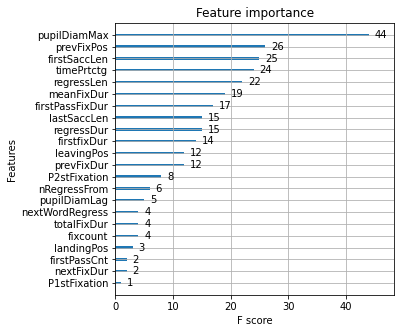

In [66]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()